## Modelling hateness, offensiveness in text
### Swetha Chandrasekar
012497628 <br>
swetha.chandrasekar@sjsu.edu
### Project Alternus vera
### factor: Trollness
<h3> In this note book, for the project of Alternus vera, <br><br><br>
-> <font color=orange> In section 1, we will define and model the factor of <font color=red><u><i>troll</i></u></font>.
This signal will be used in the polynomial for fake news prediction.</font> <br><br>

<font color=blue>
-> In Section 2, we will use the signal modeled after troll coefficients (weights) to predict fake news.<br>
</font>
 </h3>
 
### Formal Business Problem Statement: 
"

<i><u>
Given the headline text of article can we predict whether it is a troll or not? </u></i>

## What is a troll?
Troll is internet account that incites or provokes people on internet by making insulting insensitive comments.
They have the ability to hijack a conversation.

# Section 1 (modelling troll)

In [20]:
# referred from https://www.kaggle.com/alisaeidi92/a-very-simple-nlp-model-0-75-accuracy
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_json('Dataset for Detection of Cyber-Trolls.json', lines= True)
df.head()

,annotation,content,extras
0,"{'notes': '', 'label': ['1']}",Get fucking real dude.,NaN
1,"{'notes': '', 'label': ['1']}",She is as dirty as they come and that crook ...,NaN
2,"{'notes': '', 'label': ['1']}",why did you fuck it up. I could do it all day...,NaN
3,"{'notes': '', 'label': ['1']}",Dude they dont finish enclosing the fucking s...,NaN
4,"{'notes': '', 'label': ['1']}",WTF are you talking about Men? No men thats n...,NaN


In [33]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from fastai import *
from fastai import *
from fastai.text import *
from fastai.tabular import *
from fastai.vision import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

### performing stemming
from nltk import PorterStemmer 
stemmer = PorterStemmer()
def lemmatize_stemming(text):
    return text
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            if 'object' in token.strip() or 'dtype' in token.strip() or 'unknown' in token.strip():
                continue
            result.append(lemmatize_stemming(token))
    return result

word_vector_input_dataset = df.content.tolist() # tweets1.tweet.tolist()
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
data = word_vector_input_dataset
tagged_data = []
exception_count = 0
for i, _d in enumerate(data):
    try:
        tagged_data.append(TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]))
    except:
        exception_count+=1
### Train doc2vec embeddings 
print ("Total number of custom documents:",len(tagged_data))
max_epochs = 10
vec_size = 10
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=10,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("troll.model")
print("Model Saved")

[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Total number of custom documents: 20001


/opt/anaconda3/lib/python3.7/site-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
Model Saved


In [34]:
from nltk.corpus import stopwords
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
corpus = []

for i in range (0, len(df)):                              
    review = re.sub('[^a-zA-Z]',' ',df['content'][i])      
    review = review.lower()                                 
    review = review.split()                                 
    review = ' '.join(review)                               
    corpus.append(review)                                   

corpus

bow_transformer =  CountVectorizer()
bow_transformer = bow_transformer.fit(corpus)

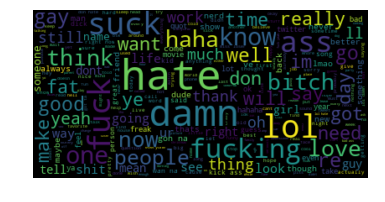

In [59]:
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = ""

for doc in corpus:
    doc = word_tokenize(doc)
    text= text + " " + ' '.join(doc)
    
wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [35]:
print(len(bow_transformer.vocabulary_))
messages_bow = bow_transformer.transform(corpus)  
tfidf_transformer = TfidfTransformer().fit(messages_bow)  
X = tfidf_transformer.transform(messages_bow)

16332


In [36]:
y = []
for i in range(0,len(df)):
    y.append(df.annotation[i]['label'])

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train,y_train)      #training the model
y_pred = classifier.predict(X_test)  #Predicting our test label

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(y_test, y_pred))

0.7546490701859628


# Section 2 (Using them to predict fake news)

In [21]:
import pandas as pd
headers = ['id','label','statement','subject',
           'speaker','job_title', 'state', 
           'affliation','barely_true','false',
           'half_true', 'mostly_true','pants_on_fire', 
           'venue']
print (len(headers))
liar_train_df = pd.read_csv('../train.tsv', names=headers, delimiter='\t')
liar_valid_df = pd.read_csv('../valid.tsv', names=headers, delimiter='\t')
liar_test_df = pd.read_csv('../test.tsv',names=headers, delimiter='\t')

14


In [23]:
statements = liar_train_df.statement.tolist()
label = liar_train_df.label.tolist()

In [38]:
training_vector = []
text = "Lol! thats the dumbest"
dvmodel= Doc2Vec.load("troll.model") ### Using a earlier trained model d2v.model 
test_sentence= [dvmodel.infer_vector(word_tokenize(text))]
print (test_sentence)

[array([ 0.083257,  0.046213,  0.258332,  0.113605, -0.014138, -0.292804,  0.114289, -0.044698,  0.098953,  0.124028],
      dtype=float32)]


In [39]:
for statement in statements:
    training_vector.append(dvmodel.infer_vector(statement))

In [44]:
troll_df= pd.DataFrame(training_vector)
troll_df['label'] = pd.Series(label)
troll_df['label'] = troll_df.label.apply(lambda x: 0 if 'barely' in str(x) or 'false' in str(x) else 1)
troll_df.columns=['0','1','2','3','4','5','6','7','8','9','label']
troll_df.head()

,0,1,2,3,4,5,6,7,8,9,label
0,2.537018,-0.321614,0.169376,-1.492093,1.012527,-1.203823,-1.298267,-1.100511,0.718208,2.492185,0
1,3.118141,-0.561401,-0.191981,-1.552008,1.206618,-1.649394,-2.094774,-1.910305,0.455243,2.602982,1
2,1.866397,-0.562808,-0.165545,-0.546028,1.048599,-1.869399,-1.368361,-1.958817,-0.127119,1.110466,1
3,2.365077,-0.201160,-0.363634,-0.551486,0.916340,-1.184154,-0.843864,-1.317291,-0.010330,2.004547,0
4,1.945798,-0.490730,0.100463,-0.543795,0.561219,-1.081011,-1.115513,-1.303067,0.054405,1.758264,1


In [46]:
features = ['0','1','2','3','4','5','6','7','8','9']
X = troll_df[features]
Y = troll_df[['label']]
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X = X.fillna(0);
Y = Y.fillna(0);
scaled_X = scaler.fit_transform(X)
scaled_Y = scaler.fit_transform(Y)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_Y, test_size=0.1, random_state=0)
lm = linear_model.LogisticRegression(verbose=1)
model = lm.fit(X_train, y_train)
print (model)
predictions = lm.predict(X_test)

print ("Score:", model.score(X_test, y_test))

[LibLinear]LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)
Score: 0.6123046875


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
predictions = lm.predict_proba(scaled_X)
troll_predictions  = [p[1] for p in predictions]
#
#for x in scaled_X:
 #   p = model.predict_proba(x)
  #  prediction.append(p)
#print (prediction)
troll_predict_df = pd.DataFrame(troll_predictions)
print (len(Y))
print (len(troll_predictions))
troll_predict_df['label_from_liar_liar_copy'] = pd.Series(liar_train_df.label.tolist())
troll_predict_df.columns = ['troll','label_from_liar_liar_copy']
troll_predict_df.head()

10240
10240


,troll,label_from_liar_liar_copy
0,0.631423,false
1,0.664333,half-true
2,0.631605,mostly-true
3,0.646070,false
4,0.646426,half-true


In [68]:
troll_predict_df.to_csv("trolling_factor_csv_file_with_header.csv")

In [70]:
troll_predict_df['label'] = troll_predict_df.label_from_liar_liar_copy.apply(lambda x: 0 if "false" in str(x) or 'barely' in str(x) else 1)

In [73]:
troll_predict_df.head()

,troll,label_from_liar_liar_copy,label
0,0.631423,false,0
1,0.664333,half-true,1
2,0.631605,mostly-true,1
3,0.646070,false,0
4,0.646426,half-true,1


In [74]:
troll_predict_df.corr()

,troll,label
troll,1.000000,0.073234
label,0.073234,1.000000
